#### import the required modules 

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np

#### Set the path to the directory where your dataset is located. The dataset directory is specified as a string and assigned to the variable dataset_dir.

#### The dataset_dir variable is later used to access the dataset files and perform operations such as loading and preprocessing the data for training a pet breed classification model.

In [2]:
# Set the path to your dataset directory
dataset_dir = 'C:/Users/Anju Reddy K/Personal_projects/pet breed classification/Pet_Breeds'

#### os.listdir(dataset_dir): This line retrieves a list of all subdirectories (breed names) within the dataset_dir directory. Each subdirectory represents a different breed of pets.

#### for breed_name in breed_names: print(breed_name): This loop iterates over each breed name in the breed_names list and prints it. It displays the names of all the different breeds present in your dataset.

In [6]:
import os

# Get all subdirectories (breed names) in the dataset directory
breed_names = os.listdir(dataset_dir)

# Display all breeds
for breed_name in breed_names:
    print(breed_name)

abyssinian
american shorthair
beagle
boxer
bulldog
chihuahua
corgi
dachshund
german shepherd
golden retriever
husky
labrador
maine coon
mumbai cat
persian cat
pomeranian
pug
ragdoll cat
rottwiler
shiba inu
siamese cat
sphynx
yorkshire terrier


#### The for loop iterates over each breed name in the breed_names list.Inside the loop, the code generates the path to the first image of the current breed using os.path.join(). It combines the dataset_dir (the main dataset directory) with the breed_name to create the path to the specific breed's directory.

#### os.listdir(breed_dir)[0] retrieves the list of files in the breed's directory and selects the first image (assuming the images are sorted in a consistent manner). This image path is then stored in the image_path variable.

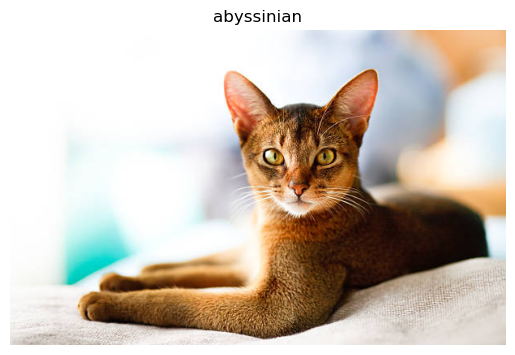

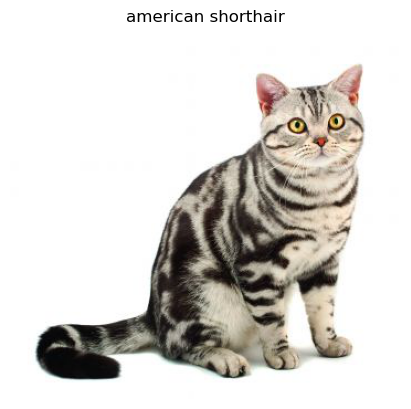

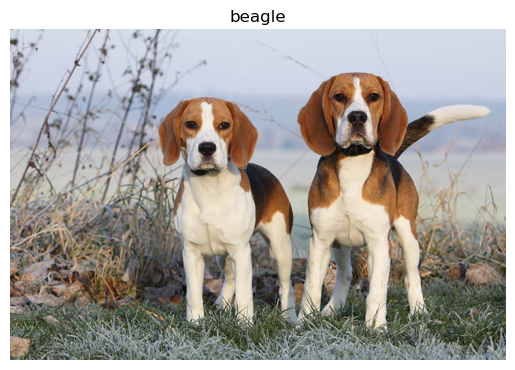

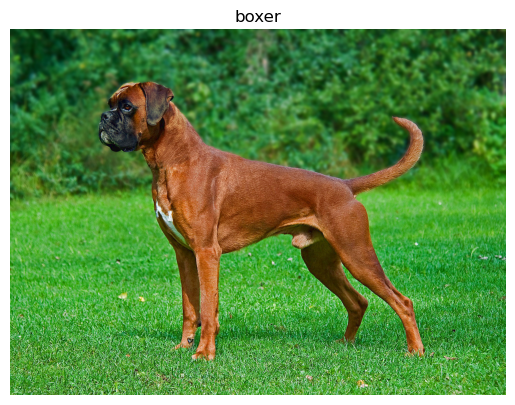

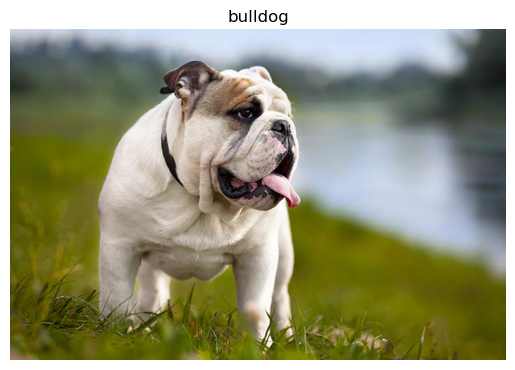

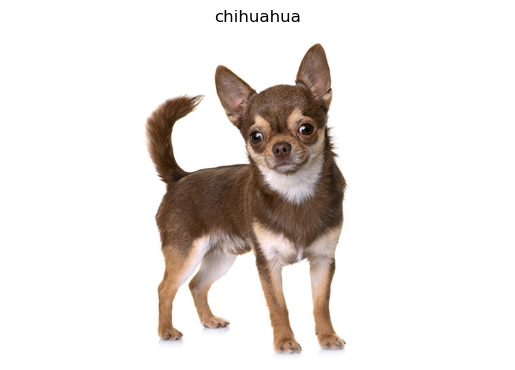

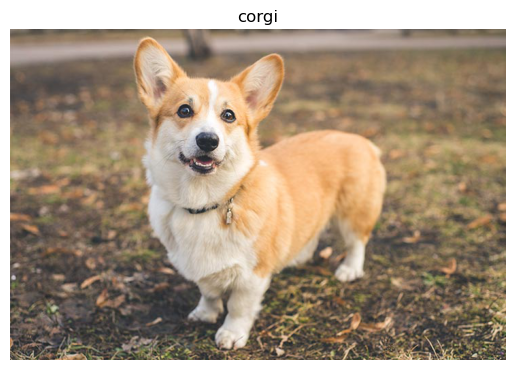

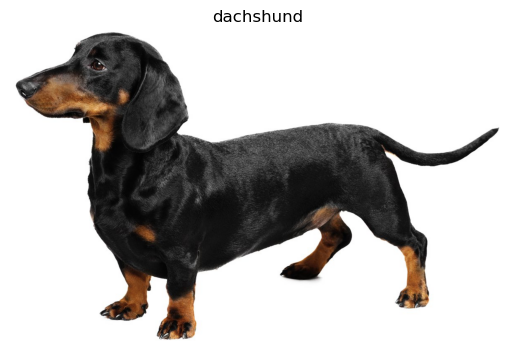

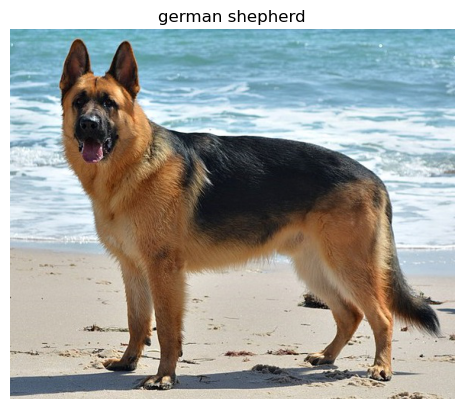

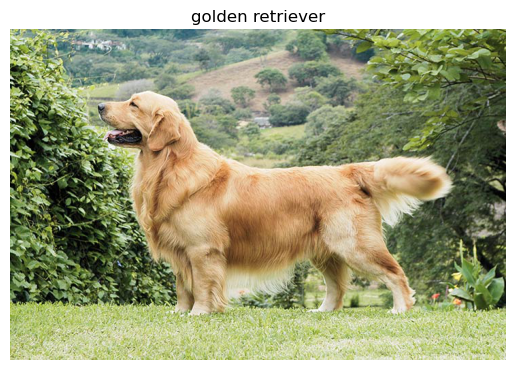

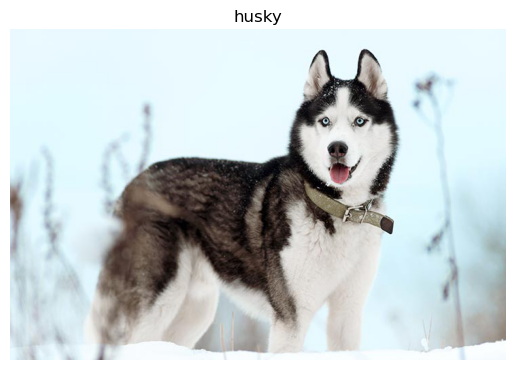

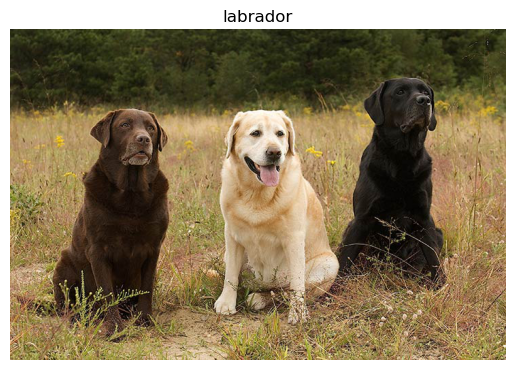

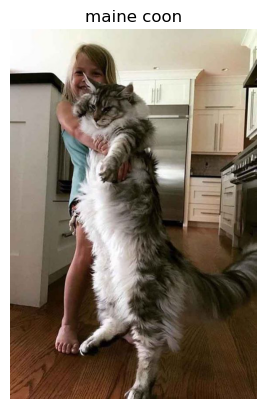

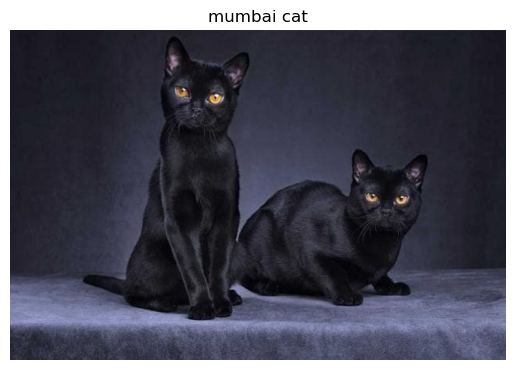

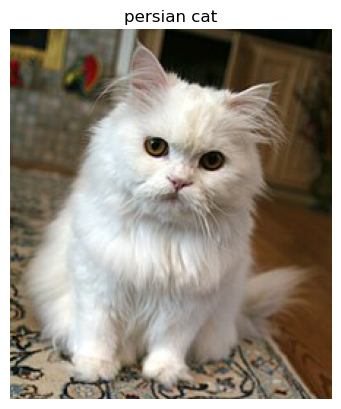

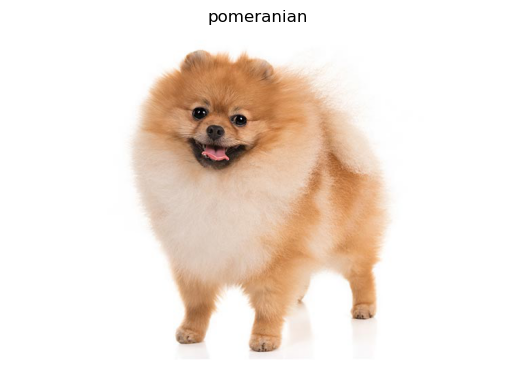

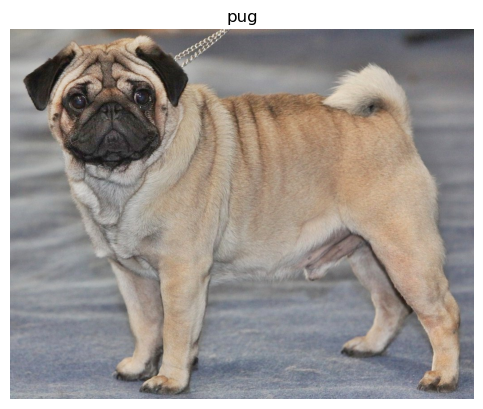

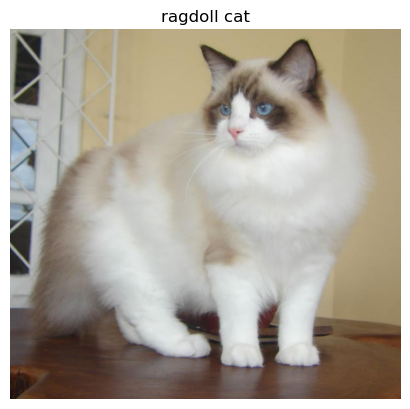

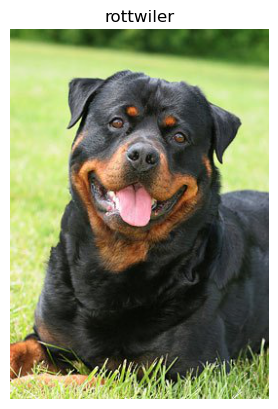

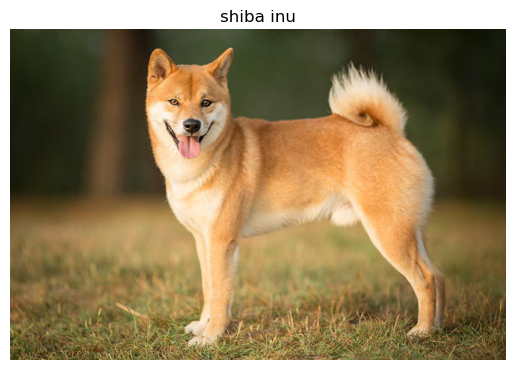

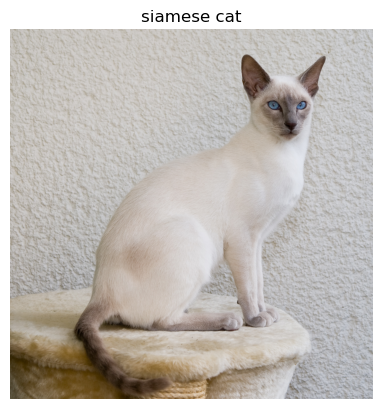

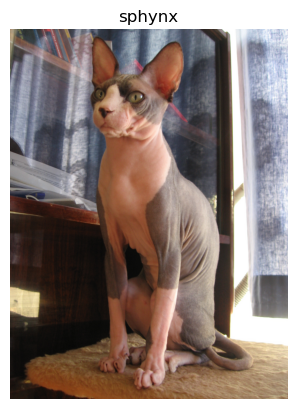

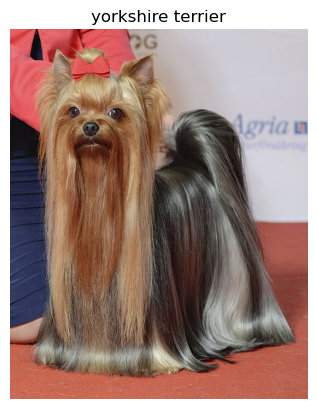

In [7]:
from PIL import Image

# Display images of each breed
for breed_name in breed_names:
    # Get the path to the first image of the breed
    breed_dir = os.path.join(dataset_dir, breed_name)
    image_path = os.path.join(breed_dir, os.listdir(breed_dir)[0])

    # Load and display the image
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(breed_name)
    plt.axis('off')
    plt.show()

#### This code block uses the Counter class from the collections module to count the occurrences of each breed in your dataset.

#### By executing this code, you will see the breed name with the most occurrences printed in the console or output window, indicating the breed that appears most frequently in your dataset. 

In [9]:
from collections import Counter

# Count the occurrences of each breed
breed_counts = Counter(breed_names)

# Find the breed with the highest count
most_common_breed = breed_counts.most_common(1)[0][0]

# Display the breed with the highest count
print("The breed with the most occurrences is:", most_common_breed)

The breed with the most occurrences is: abyssinian


#### This code block extracts the breed names and their respective counts from the breed_counts counter object and creates a pie chart to visualize the distribution of pet breeds in your dataset

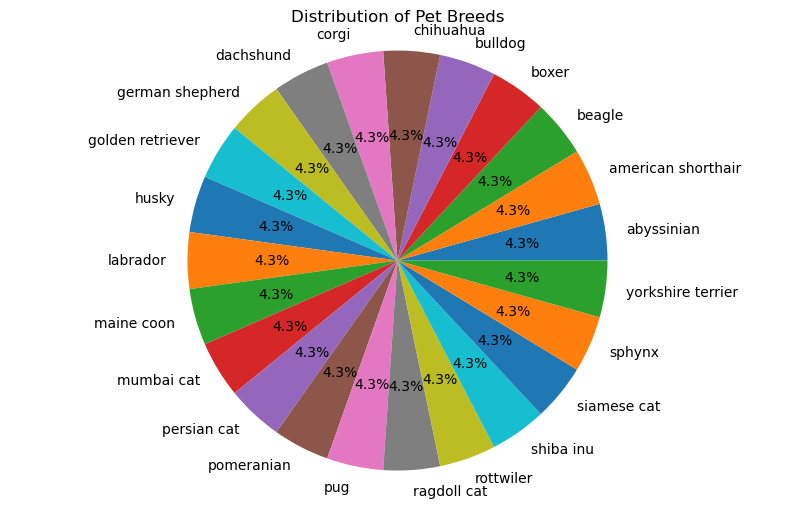

In [10]:
# Extract breed names and their counts
breeds = list(breed_counts.keys())
counts = list(breed_counts.values())

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(counts, labels=breeds, autopct='%1.1f%%')
plt.title('Distribution of Pet Breeds')
plt.axis('equal')
plt.show()

In [20]:
# Set the image size for resizing
image_size = (224, 224)

# Set the batch size
batch_size = 25

#### This code block demonstrates data preprocessing and augmentation using the ImageDataGenerator class from TensorFlow.

#### datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2): This line creates an instance of ImageDataGenerator with two parameters:rescale=1./255: This parameter normalizes the pixel values of the images, scaling them between 0 and 1. Dividing by 255 achieves this normalization.validation_split=0.2: This parameter specifies the fraction of the data that will be used for validation. In this case, 20% of the data will be reserved for validation.

#### train_data = datagen.flow_from_directory(...): This line creates a data generator for the training set. It uses the flow_from_directory method of the ImageDataGenerator object to load the dataset from the dataset_dir directory and split it into training and validation sets. 

#### validation_data = datagen.flow_from_directory(...): This line creates a data generator for the validation set. It is similar to the previous line but with subset='validation', indicating that it should provide data from the validation subset.

In [21]:
# Data preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values between 0 and 1
    validation_split=0.2  # Split the dataset into training and validation sets
)

# Load the dataset and split it into training and validation sets
train_data = datagen.flow_from_directory(
    dataset_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Use a subset of the data for training
)

validation_data = datagen.flow_from_directory(
    dataset_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Use a subset of the data for validation
)

# Print the class labels
print(train_data.class_indices)

Found 3105 images belonging to 23 classes.
Found 776 images belonging to 23 classes.
{'abyssinian': 0, 'american shorthair': 1, 'beagle': 2, 'boxer': 3, 'bulldog': 4, 'chihuahua': 5, 'corgi': 6, 'dachshund': 7, 'german shepherd': 8, 'golden retriever': 9, 'husky': 10, 'labrador': 11, 'maine coon': 12, 'mumbai cat': 13, 'persian cat': 14, 'pomeranian': 15, 'pug': 16, 'ragdoll cat': 17, 'rottwiler': 18, 'shiba inu': 19, 'siamese cat': 20, 'sphynx': 21, 'yorkshire terrier': 22}


In [22]:
num_classes = 23

#### This code block extracts the breed names and their respective counts from the breed_counts counter object and plots a bar chart to visualize the distribution of pet breeds in your dataset. 

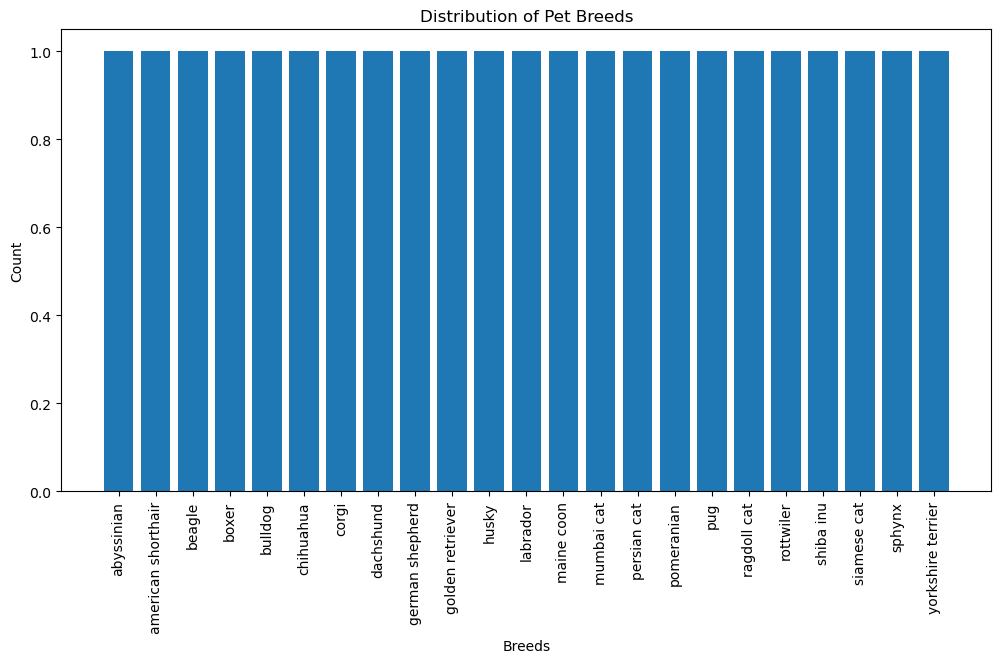

In [23]:
# Extract breed names and their counts
breeds = list(breed_counts.keys())
counts = list(breed_counts.values())

# Plot the breed distribution
plt.figure(figsize=(12, 6))
plt.bar(breeds, counts)
plt.title('Distribution of Pet Breeds')
plt.xlabel('Breeds')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

#### This code block demonstrates the process of splitting the dataset into train, validation, and test sets and organizing the files into corresponding directories. 

#### train_ratio = 0.7: This line sets the desired ratio for the training set.

#### val_ratio = 0.15: This line sets the desired ratio for the validation set.

#### test_ratio = 0.15: This line sets the desired ratio for the test set.

#### breed_names = os.listdir(dataset_dir): This line retrieves all subdirectories (breed names) in the dataset directory.

#### os.makedirs(train_dir, exist_ok=True): This line creates the train directory if it does not exist.

#### os.makedirs(val_dir, exist_ok=True): This line creates the validation directory if it does not exist.

#### os.makedirs(test_dir, exist_ok=True): This line creates the test directory if it does not exist.

#### Executing this code will split the dataset into train, validation, and test sets according to the specified ratios and organize the files into their respective directories. The train directory will contain the training images, the validation directory will contain the validation images, and the test directory will contain the test images, with each breed in its corresponding subdirectory.

In [24]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Set the path to your dataset directory
dataset_dir = 'C:/Users/Anju Reddy K/Personal_projects/pet breed classification/Pet_Breeds'

# Set the paths for train, validation, and test directories
train_dir = 'C:/Users/Anju Reddy K/Personal_projects/pet breed classification/Train'
val_dir = 'C:/Users/Anju Reddy K/Personal_projects/pet breed classification/Validation'
test_dir = 'C:/Users/Anju Reddy K/Personal_projects/pet breed classification/Test'

# Set the desired train-validation-test split ratios
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Get all subdirectories (breed names) in the dataset directory
breed_names = os.listdir(dataset_dir)

# Create train, validation, and test directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Split the data and move files to the corresponding directories
for breed_name in breed_names:
    breed_dir = os.path.join(dataset_dir, breed_name)
    files = os.listdir(breed_dir)
    train_files, test_files = train_test_split(files, test_size=val_ratio+test_ratio, random_state=42)
    val_files, test_files = train_test_split(test_files, test_size=test_ratio/(val_ratio+test_ratio), random_state=42)

    # Move files to the train directory
    for file in train_files:
        src = os.path.join(breed_dir, file)
        dst = os.path.join(train_dir, breed_name, file)
        os.makedirs(os.path.join(train_dir, breed_name), exist_ok=True)
        shutil.copy(src, dst)

    # Move files to the validation directory
    for file in val_files:
        src = os.path.join(breed_dir, file)
        dst = os.path.join(val_dir, breed_name, file)
        os.makedirs(os.path.join(val_dir, breed_name), exist_ok=True)
        shutil.copy(src, dst)

    # Move files to the test directory
    for file in test_files:
        src = os.path.join(breed_dir, file)
        dst = os.path.join(test_dir, breed_name, file)
        os.makedirs(os.path.join(test_dir, breed_name), exist_ok=True)
        shutil.copy(src, dst)

#### This code block defines a dictionary that maps breeds to their corresponding animal types and prints the breed along with its corresponding animal type. 

In [25]:
import os

# Set the path to your dataset directory
dataset_dir = 'C:/Users/Anju Reddy K/Personal_projects/pet breed classification/Pet_Breeds'

# Get all subdirectories (breed names) in the dataset directory
breed_names = os.listdir(dataset_dir)

# Define a dictionary mapping breeds to their corresponding animal type
breed_animal_type = {
    'dog': ['beagle','boxer','bulldog','chihuahua','corgi','dachshund','german shepherd','golden retriever','husky','labrador',
           'pomeranian','pug','rottwiler','shiba inu','yorkshire terrier'],
    'cat': ['abyssinian', 'american shorthair', 'maine coon','mumbai cat','persian cat','ragdoll cat','siamese cat','sphynx']
}

# Print the breed and its corresponding animal type
for breed_name in breed_names:
    for animal_type, breeds in breed_animal_type.items():
        if breed_name in breeds:
            print(f'{breed_name}: {animal_type}')
            break


abyssinian: cat
american shorthair: cat
beagle: dog
boxer: dog
bulldog: dog
chihuahua: dog
corgi: dog
dachshund: dog
german shepherd: dog
golden retriever: dog
husky: dog
labrador: dog
maine coon: cat
mumbai cat: cat
persian cat: cat
pomeranian: dog
pug: dog
ragdoll cat: cat
rottwiler: dog
shiba inu: dog
siamese cat: cat
sphynx: cat
yorkshire terrier: dog


#### This code block sets the paths for the train, validation, and test directories and then counts the number of images in each directory. Finally, it prints the total number of images in each set.

In [26]:
# Set the paths for train, validation, and test directories
train_dir = 'C:/Users/Anju Reddy K/Personal_projects/pet breed classification/Train'
val_dir = 'C:/Users/Anju Reddy K/Personal_projects/pet breed classification/Validation'
test_dir = 'C:/Users/Anju Reddy K/Personal_projects/pet breed classification/Test'

# Count the number of images in the training directory
train_count = sum([len(files) for _, _, files in os.walk(train_dir)])

# Count the number of images in the validation directory
val_count = sum([len(files) for _, _, files in os.walk(val_dir)])

# Count the number of images in the test directory
test_count = sum([len(files) for _, _, files in os.walk(test_dir)])

# Print the total number of images in each set
print('Total Number of training images:', train_count)
print('Total Number of validation images:', val_count)
print('Total Number of test images:', test_count)


Total Number of training images: 2716
Total Number of validation images: 571
Total Number of test images: 594


#### This code block creates an ImageDataGenerator object for data augmentation and normalization. 

#### train_datagen = ImageDataGenerator(: This line initializes an ImageDataGenerator object for the training data.

#### rescale=1./255,: This parameter rescales the pixel values of the images to a range of 0 to 1 by dividing them by 255. This normalization step helps in better training of the model.

#### rotation_range=20,: This parameter specifies the range of random rotation in degrees for augmenting the training images. It randomly rotates the images within the specified range.

#### width_shift_range=0.2,: This parameter defines the range for randomly shifting the width of the images. It randomly shifts the images horizontally within the specified range.

#### height_shift_range=0.2,: This parameter defines the range for randomly shifting the height of the images. It randomly shifts the images vertically within the specified range.

#### shear_range=0.2,: This parameter specifies the range for applying shear transformations to the images. It randomly applies shear transformations within the specified range.

#### zoom_range=0.2,: This parameter determines the range for randomly zooming in or out on the images. It randomly applies zooming within the specified range.

#### horizontal_flip=True: This parameter enables horizontal flipping of the images. It randomly flips the images horizontally.

In [27]:
# Create an ImageDataGenerator for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

#### These lines of code create two ImageDataGenerator objects, val_datagen and test_datagen, for validation and testing data.

In [28]:
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

#### The code snippet provided generates batches of augmented training data using the train_datagen object.

In [29]:
# Generate batches of augmented training, validation, and test data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 2716 images belonging to 23 classes.


#### The code snippet provided generates batches of validation data using the val_datagen object. 

In [30]:
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 571 images belonging to 23 classes.


#### The code snippet provided generates batches of test data using the test_datagen object. 

In [31]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 594 images belonging to 23 classes.


#### The code provided builds a CNN model using the Sequential API in TensorFlow/Keras. Here's an explanation of the code:

#### model = Sequential(): This initializes a sequential model, which is a linear stack of layers.

#### model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3))): This adds a convolutional layer with 32 filters, each having a size of 3x3. The activation function used is ReLU. The input shape specifies the shape of the input images as (224, 224, 3), representing height, width, and channels (RGB).

#### model.add(MaxPooling2D((2, 2))): This adds a max pooling layer with a pool size of 2x2, which reduces the spatial dimensions of the input.

#### The above two steps are repeated with increased filter size in the subsequent layers to extract more complex features from the input.

#### model.add(Flatten()): This flattens the output from the previous layer into a 1D array.

#### model.add(Dense(128, activation='relu')): This adds a fully connected layer with 128 neurons and applies the ReLU activation function.

#### model.add(Dense(num_classes, activation='softmax')): This adds the final dense layer with the number of neurons equal to the number of classes. The activation function used is softmax, which outputs probabilities for each class.

#### model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']): This compiles the model with the specified optimizer (Adam), loss function (categorical crossentropy), and evaluation metric (accuracy).

In [33]:
# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#### The code provided trains the CNN model using the fit method in TensorFlow/Keras. 

In [34]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)

Epoch 1/10
108/108 [==============================] - 363s 3s/step - loss: 3.1400 - accuracy: 0.0580 - val_loss: 3.0241 - val_accuracy: 0.0691
Epoch 2/10
108/108 [==============================] - 304s 3s/step - loss: 3.0165 - accuracy: 0.0951 - val_loss: 2.9716 - val_accuracy: 0.1291
Epoch 3/10
108/108 [==============================] - 305s 3s/step - loss: 2.9216 - accuracy: 0.1338 - val_loss: 2.9142 - val_accuracy: 0.1727
Epoch 4/10
108/108 [==============================] - 307s 3s/step - loss: 2.8419 - accuracy: 0.1594 - val_loss: 2.8342 - val_accuracy: 0.1636
Epoch 5/10
108/108 [==============================] - 306s 3s/step - loss: 2.7693 - accuracy: 0.1817 - val_loss: 2.7149 - val_accuracy: 0.2036
Epoch 6/10
108/108 [==============================] - 305s 3s/step - loss: 2.6865 - accuracy: 0.2003 - val_loss: 2.6662 - val_accuracy: 0.2091
Epoch 7/10
108/108 [==============================] - 338s 3s/step - loss: 2.6273 - accuracy: 0.2163 - val_loss: 2.5920 - val_accuracy: 0.2309

#### Evaluate the model on the test data

In [36]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy*100)

23/23 [==============================] - 24s 1s/step - loss: 2.6473 - accuracy: 0.2365
Test Loss: 2.6472859382629395
Test Accuracy: 23.652173578739166


Upload an image: dog.jpg
1/1 [==============================] - 0s 48ms/step


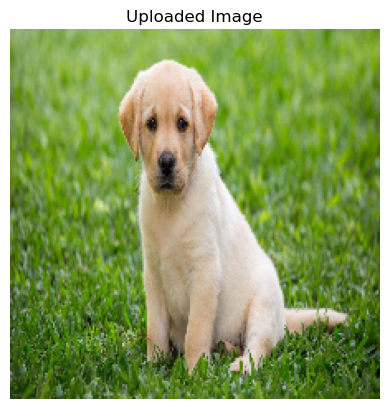

Predicted breed: corgi


In [39]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

class_names = ['abyssinian', 'american shorthair', 'beagle', 'boxer', 'bulldog', 'chihuahua', 'corgi', 'dachshund',
               'german shepherd', 'golden retriever', 'husky', 'labrador', 'maine coon', 'mumbai cat', 'persian cat',
               'pomeranian', 'pug', 'ragdoll cat', 'rottwiler', 'shiba inu', 'siamese cat', 'sphynx', 'yorkshire terrier']

# Prompt the user to upload an image
uploaded_file = input("Upload an image: ")

# Load the image and preprocess it
img = image.load_img(uploaded_file, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Make the prediction
prediction = model.predict(img_array)
breed_index = np.argmax(prediction)
predicted_breed = class_names[breed_index]

# Display the uploaded image
plt.imshow(img)
plt.title('Uploaded Image')
plt.axis('off')
plt.show()

# Display the predicted breed
print("Predicted breed:", predicted_breed)

In [40]:
import pickle

# Define the filename for the pickle file
pickle_filename = 'model.pickle'

# Pickle the model
with open(pickle_filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model pickled and saved as {pickle_filename}.")

Model pickled and saved as model.pickle.
